# **Data Preprocessing**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
df = pd.read_csv('/drive/My Drive/Colab Notebooks/Bengaluru_House_Data.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### **Exploratory Data Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


There are only three numerical variables :- bath,balcony and price

Six categorical variables :- area_type,availability,location,size,society and total_sqft

Targate variable ===>>> price

In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


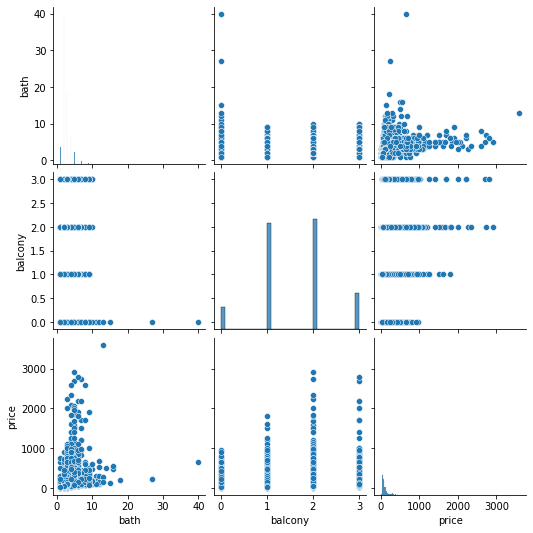

In [7]:
sns.pairplot(df)

There are some outliers in bath and balcony

In [8]:
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print('-------------------------')

In [9]:
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
-------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Jul               1
17-Jan               1
15-Jun               1
15-Dec               1
16-Jan               1
Name: availability, Length: 81, dtype: int64
-------------------------
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Nagarbhavi  BDA Complex      1
Vayunandana Layout           1
3rd Block HBR Layout         1
Neelasandra                  1
Addischetan Layout           1
Name: location, Length: 1305, dtype: int64
-------------------------
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547

In [10]:
df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


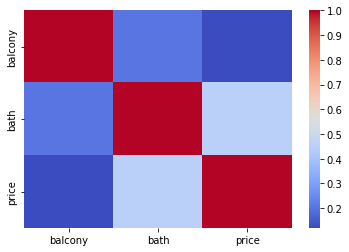

In [11]:
l=["balcony","bath","price"]
sns.heatmap(df[l].corr(),cmap="coolwarm")

Correlation of bath is higher than balcony

### Data **Cleaning**

Missing Value Emputation

In [12]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
df.isnull().mean()*100
#shows percentage of missing values

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

Society has nearly 41% missing values so we have to remove it

In [14]:
df2 = df.drop('society',axis="columns")

Location,bath and size has very less missing value so we can delete those rows 

In [15]:
df3 = df2.dropna()

We can fill balcony missing values with mean value

In [16]:
df3['balcony'] = df3['balcony'].fillna(df3['balcony'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

## **Feature Engineering**

### **Converting total_sqft variable in numeric**

In [18]:
df3['total_sqft'].value_counts()

1200    788
1100    218
1500    198
2400    177
600     172
       ... 
3044      1
5600      1
3381      1
4278      1
3179      1
Name: total_sqft, Length: 1976, dtype: int64

In [19]:
total_sqft_int = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then conver in float
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # '123 - 534' this str value split and take mean
    except:
      total_sqft_int.append(np.nan) # if value not contain in above format then consider as nan

In [20]:
df4 = df3.reset_index(drop=True)

In [21]:
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))

In [22]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    42
dtype: int64

In [23]:
df5 = df5.dropna()

In [24]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12668 entries, 0 to 12709
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12668 non-null  object 
 1   availability    12668 non-null  object 
 2   location        12668 non-null  object 
 3   size            12668 non-null  object 
 4   total_sqft      12668 non-null  object 
 5   bath            12668 non-null  float64
 6   balcony         12668 non-null  float64
 7   price           12668 non-null  float64
 8   total_sqft_int  12668 non-null  float64
dtypes: float64(4), object(5)
memory usage: 989.7+ KB


### **Convert Size in Numeric**

In [25]:
df5['size'].value_counts()

2 BHK         5147
3 BHK         4119
4 Bedroom      747
1 BHK          526
3 Bedroom      522
4 BHK          488
2 Bedroom      324
5 Bedroom      260
6 Bedroom      168
1 Bedroom      100
7 Bedroom       69
8 Bedroom       64
5 BHK           35
9 Bedroom       29
6 BHK           23
7 BHK           16
1 RK            13
9 BHK            4
8 BHK            3
10 Bedroom       3
11 Bedroom       2
12 Bedroom       1
27 BHK           1
14 BHK           1
13 BHK           1
11 BHK           1
43 Bedroom       1
Name: size, dtype: int64

In [26]:
bhk = []
for x in df5['size']:
  l=[]
  l=x.split(" ")
  bhk.append(int(l[0]))

In [27]:
len(bhk)

12668

In [28]:
df5 = df5.reset_index(drop=True)

In [29]:
df6 = df5.join(pd.DataFrame({'bhk':bhk}))

In [30]:
df6 = df6.drop(['size'],axis=1)

We have converted all variable to numeric type which are possible to convert

### **Finding and Removing Outliers**

In [31]:
def box_plot(df,var):
  sns.boxplot(x=df[var])
  plt.show()

bath


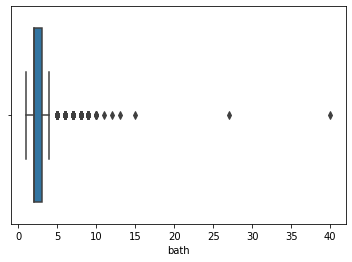

balcony


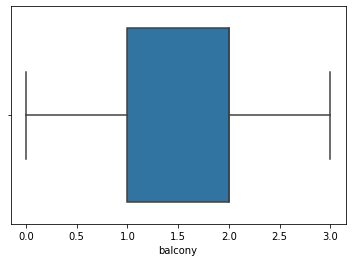

total_sqft_int


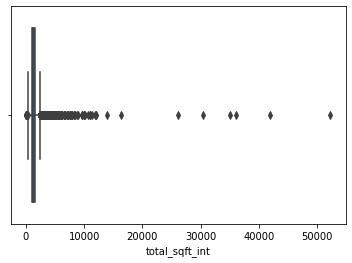

bhk


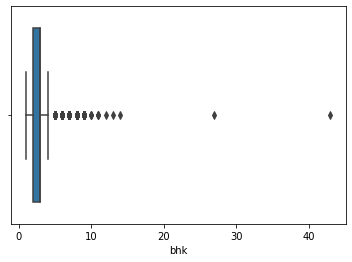

price


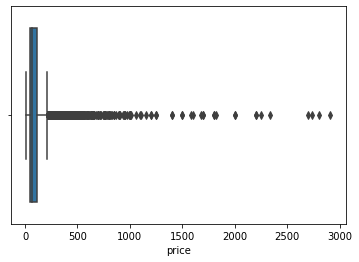

In [32]:
x=["bath","balcony","total_sqft_int","bhk","price"]
for i in x:
  print(i)
  box_plot(df6,i)

Here We consider minimum 350 sqft for 1 BHK

So area<350 sqft will be outier

In [33]:
x=df6[df6['total_sqft_int']/df6['bhk'] < 300]

In [34]:
df7=df6[~(df6['total_sqft_int']/df6['bhk']<300)]
#df7=df6[~(df6['total_sqft_int']/df6['bhk']<350)]

In [35]:
df7.shape

(12013, 9)

Now we have to calculate price per sqft

In [36]:
df7['price_per_sqft'] = df7['price'] * 100000 / df7['total_sqft_int']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df7.head()

,area_type,availability,location,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [38]:
df7.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

Price per Sqft under mean-std and above mean+std are consider as outlier

In [39]:
temp_df = pd.DataFrame()
m = np.mean(df7.price_per_sqft)
std = np.std(df7.price_per_sqft)
for key,subdf in df7.groupby('location'):
  df_reduce = subdf[  (  subdf.price_per_sqft  >  (  m-std  ))  &  (  subdf.price_per_sqft  <  (  m+std  )  )  ]
  temp_df = pd.concat([temp_df,df_reduce],ignore_index=True)

In [40]:
temp_df.shape

(10896, 10)

In [41]:
df8 = temp_df

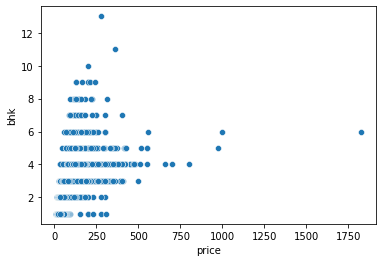

In [42]:
sns.scatterplot(data=df8,y="bhk",x="price")

In [43]:
def scatter_plt(df,loc):
  plt.figure(figsize=(16,9))
  bhk2 = df[(df.location==loc) & (df.bhk==2)]
  bhk3 = df[(df.location==loc) & (df.bhk==3)]
  plt.scatter(bhk2.total_sqft_int,bhk2.price,label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft_int,bhk3.price,label='3 BHK',s=50)
  plt.xlabel("Total Area")
  plt.ylabel("Price")
  plt.legend()

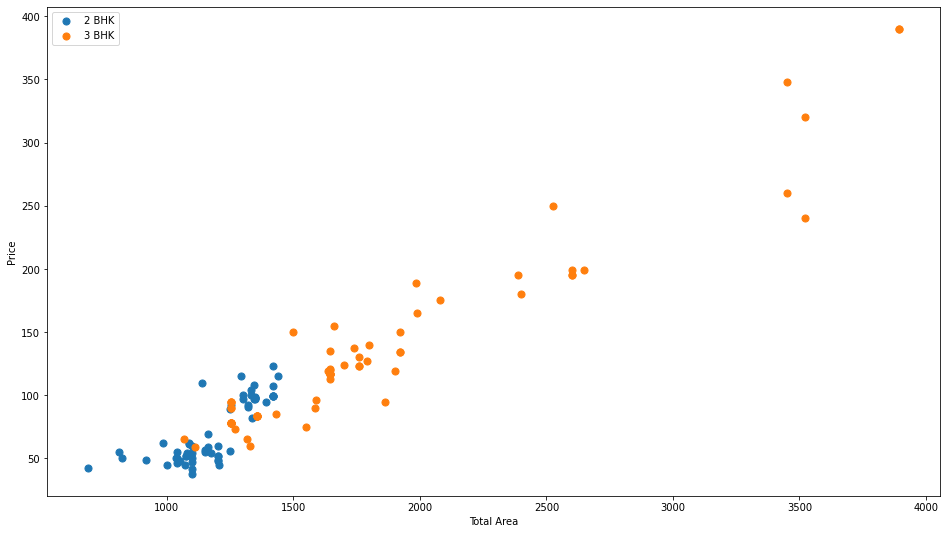

In [44]:
scatter_plt(df8,"Hebbal")

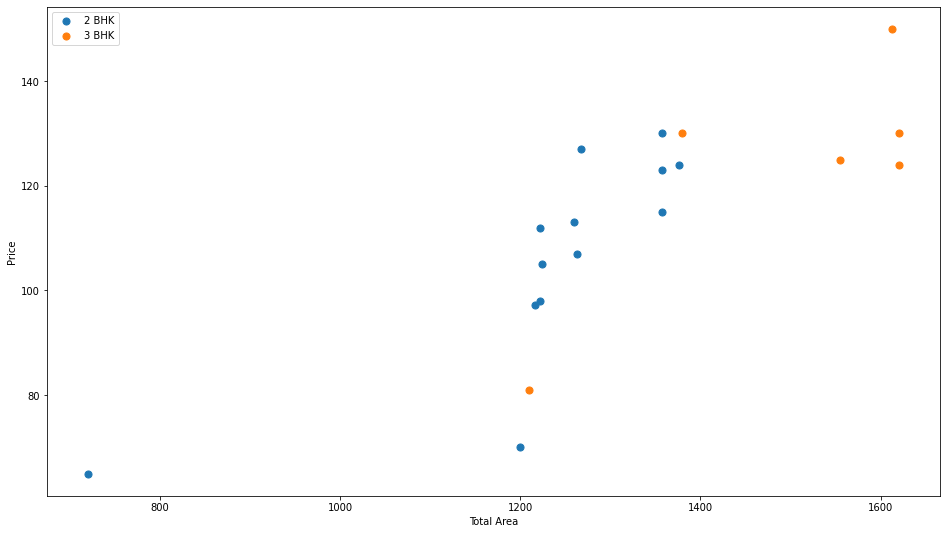

In [45]:
scatter_plt(df8,"Rajaji Nagar")

In [46]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')
  

In [47]:
df9 = remove_bhk_outliers(df8)
df9.shape

(8807, 10)

Removing Outliers in bath variable

In [48]:
df9['bath'].value_counts()

2.0     5310
3.0     2031
1.0      639
4.0      503
5.0      182
6.0       93
7.0       25
8.0       14
9.0        7
10.0       2
13.0       1
Name: bath, dtype: int64

In [49]:
df10 = df9[df9.bath < df9.bhk+2]
df10.shape

(8736, 10)

In [50]:
df10.head(10)

,area_type,availability,location,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Built-up Area,Ready To Move,Anekal,351,1.0,1.0,16.0,351.0,1,4558.404558
1,Super built-up Area,Ready To Move,Banaswadi,527,1.0,0.0,35.0,527.0,1,6641.366224
2,Super built-up Area,Ready To Move,Basavangudi,670,1.0,1.0,50.0,670.0,1,7462.686567
3,Super built-up Area,Ready To Move,Devarabeesana Halli,1100,2.0,1.0,70.0,1100.0,2,6363.636364
4,Super built-up Area,Ready To Move,Devarabeesana Halli,1672,3.0,2.0,150.0,1672.0,3,8971.291866
5,Built-up Area,Ready To Move,Devarabeesana Halli,1750,3.0,3.0,149.0,1750.0,3,8514.285714
6,Super built-up Area,Ready To Move,Devarabeesana Halli,1670,3.0,2.0,160.0,1670.0,3,9580.838323
7,Super built-up Area,Ready To Move,Devarabeesana Halli,1750,3.0,2.0,150.0,1750.0,3,8571.428571
8,Super built-up Area,Ready To Move,Devarabeesana Halli,1296,2.0,2.0,70.0,1296.0,2,5401.234568
10,Super built-up Area,Ready To Move,Devarachikkanahalli,1250,2.0,2.0,40.0,1250.0,2,3200.000000


For ML model we have to drop categorical variables

In [51]:
ml_df = df10.drop(['area_type','availability','location','total_sqft'],axis=1)
ml_df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,1.0,1.0,16.0,351.0,1,4558.404558
1,1.0,0.0,35.0,527.0,1,6641.366224
2,1.0,1.0,50.0,670.0,1,7462.686567
3,2.0,1.0,70.0,1100.0,2,6363.636364
4,3.0,2.0,150.0,1672.0,3,8971.291866


In [52]:
ml_df.to_csv('ml_banglore_price.csv',index=False)

### **Categorical variable Encoding**

**Area Type**

In [53]:
df10['area_type'].value_counts()

Super built-up  Area    6340
Built-up  Area          1686
Plot  Area               639
Carpet  Area              71
Name: area_type, dtype: int64

In [54]:
for i in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df10[i] = np.where(df10['area_type']==i,1,0)
df10 = df10.drop(['area_type'],axis=1)
df10.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(8736, 12)

In [55]:
df10.head()

,availability,location,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,Super built-up Area,Built-up Area,Plot Area
0,Ready To Move,Anekal,351,1.0,1.0,16.0,351.0,1,4558.404558,0,1,0
1,Ready To Move,Banaswadi,527,1.0,0.0,35.0,527.0,1,6641.366224,1,0,0
2,Ready To Move,Basavangudi,670,1.0,1.0,50.0,670.0,1,7462.686567,1,0,0
3,Ready To Move,Devarabeesana Halli,1100,2.0,1.0,70.0,1100.0,2,6363.636364,1,0,0
4,Ready To Move,Devarabeesana Halli,1672,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0


**Working on availability**

In [56]:
df10['availability'].value_counts()

Ready To Move    6841
18-May            205
18-Dec            198
18-Apr            195
18-Aug            153
                 ... 
17-Jan              1
21-Aug              1
20-May              1
16-Mar              1
16-Oct              1
Name: availability, Length: 73, dtype: int64

In [57]:
df10['available'] = np.where(df10['availability']=="Ready To Move",1,0)
df10 = df10.drop(['availability'],axis=1)

In [58]:
df10.head()

,location,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,Super built-up Area,Built-up Area,Plot Area,available
0,Anekal,351,1.0,1.0,16.0,351.0,1,4558.404558,0,1,0,1
1,Banaswadi,527,1.0,0.0,35.0,527.0,1,6641.366224,1,0,0,1
2,Basavangudi,670,1.0,1.0,50.0,670.0,1,7462.686567,1,0,0,1
3,Devarabeesana Halli,1100,2.0,1.0,70.0,1100.0,2,6363.636364,1,0,0,1
4,Devarabeesana Halli,1672,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1


In [59]:
df10.shape

(8736, 12)

**Working on Location variable**

In [60]:
loc_val_count = df10['location'].value_counts()
loc_val_count

Whitefield                              244
Sarjapur  Road                          221
Thanisandra                             147
Raja Rajeshwari Nagar                   138
Hebbal                                  134
                                       ... 
RMV                                       1
Anathanagar                               1
KG Halli                                  1
T c palya                                 1
ravindra nagar, T.dasarahalli peenya      1
Name: location, Length: 1064, dtype: int64

In [61]:
type(loc_val_count)

pandas.core.series.Series

In [62]:
loc_gret20 = loc_val_count[loc_val_count>=20].index

In [63]:
loc_gret20

Index(['Whitefield', 'Sarjapur  Road', 'Thanisandra', 'Raja Rajeshwari Nagar',
       'Hebbal', 'Uttarahalli', 'Electronic City', 'Haralur Road',
       'Marathahalli', 'Hennur Road',
       ...
       'Bommanahalli', 'Devanahalli', 'Kodichikkanahalli', 'Kathriguppe',
       'Anandapura', 'Rajaji Nagar', 'Iblur Village', 'Margondanahalli',
       'Kogilu', 'Kambipura'],
      dtype='object', length=104)

In [64]:
df11 = df10.copy()
for i in loc_gret20:
  df11['loc_'+i] = np.where(df11['location']==i,1,0) 

In [65]:
df11.head()

,location,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,Super built-up Area,Built-up Area,Plot Area,available,loc_Whitefield,loc_Sarjapur Road,loc_Thanisandra,loc_Raja Rajeshwari Nagar,loc_Hebbal,loc_Uttarahalli,loc_Electronic City,loc_Haralur Road,loc_Marathahalli,loc_Hennur Road,loc_7th Phase JP Nagar,loc_Bannerghatta Road,loc_Yelahanka,loc_Electronic City Phase II,loc_Kanakpura Road,loc_Bellandur,loc_KR Puram,loc_Harlur,loc_Varthur,loc_Sarjapur,loc_Hosa Road,loc_Kasavanhalli,loc_Hoodi,loc_Hormavu,loc_Begur Road,loc_Chandapura,loc_Jakkur,loc_Banashankari,...,loc_Kengeri Satellite Town,loc_Attibele,loc_Jigani,loc_Kadugodi,loc_Tumkur Road,loc_Balagere,loc_5th Phase JP Nagar,loc_Brookefield,loc_Subramanyapura,loc_Sahakara Nagar,loc_Vijayanagar,loc_Ananth Nagar,loc_Kudlu Gate,loc_Kudlu,loc_Ambedkar Nagar,loc_TC Palaya,loc_Doddathoguru,loc_Koramangala,loc_9th Phase JP Nagar,loc_Budigere,loc_Kammasandra,loc_Horamavu Banaswadi,loc_Yelahanka New Town,loc_Dodda Nekkundi,loc_Vidyaranyapura,loc_Lingadheeranahalli,loc_Old Airport Road,loc_Mahadevpura,loc_Nagarbhavi,loc_Ambalipura,loc_Bommanahalli,loc_Devanahalli,loc_Kodichikkanahalli,loc_Kathriguppe,loc_Anandapura,loc_Rajaji Nagar,loc_Iblur Village,loc_Margondanahalli,loc_Kogilu,loc_Kambipura
0,Anekal,351,1.0,1.0,16.0,351.0,1,4558.404558,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Banaswadi,527,1.0,0.0,35.0,527.0,1,6641.366224,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Basavangudi,670,1.0,1.0,50.0,670.0,1,7462.686567,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Devarabeesana Halli,1100,2.0,1.0,70.0,1100.0,2,6363.636364,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Devarabeesana Halli,1672,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df12 = df11.drop(['location','total_sqft'],axis=1)

In [67]:
df12.shape

(8736, 114)

In [68]:
df12.to_csv('clean_banglore_price.csv',index=False)

In [70]:
from google.colab import files
files.download("ml_banglore_price.csv")
files.download("clean_banglore_price.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>